In [50]:
import pandas as pd
import matplotlib.pyplot as plt


In [51]:
df = pd.read_csv("/content/bank.csv")

In [52]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [53]:
from sklearn.datasets import make_blobs

In [54]:
make_blobs?

In [55]:
X,y=make_blobs(n_samples=100,n_features=2,centers=3)

In [56]:
print(X.shape,y.shape)

(100, 2) (100,)


In [57]:
print(type(X),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [58]:
print(X[:10])
print()
print(y[:10])

[[ -4.38055368  -7.28512859]
 [ -9.95564958  -8.87329694]
 [ -1.4674795   -4.3075197 ]
 [ -5.50845771  -6.522502  ]
 [  1.38433177  -2.00188327]
 [ -7.61789026  -8.23877283]
 [-10.95301493  -8.2887203 ]
 [  0.58889135  -5.64354314]
 [ -6.03198948  -9.57751699]
 [ -6.42372709  -6.6325581 ]]

[0 2 1 0 1 2 2 1 0 0]


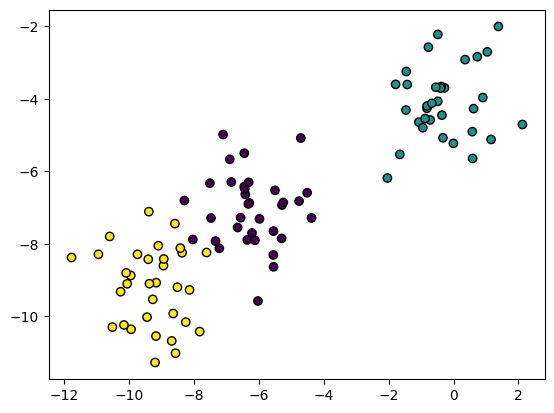

In [59]:
plt.scatter(X[:,0],X[:,1],c=y,edgecolors="k")

In [60]:
from sklearn.cluster import KMeans

In [61]:
from sklearn.preprocessing import LabelEncoder
cat_col=[fea for fea in df.columns if df[fea].dtypes =="O"]
lr=LabelEncoder()
for fea in cat_col:
  df[fea]=lr.fit_transform(df[fea])

In [62]:
wcss = []

In [63]:
for i in range(1,11):
  km=KMeans(n_clusters=i)
  km.fit_predict(df)
  wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [64]:
wcss

[41293303902.22335,
 17899797031.97803,
 9862282799.620125,
 6657919491.072379,
 4403636149.8576975,
 3043806253.7203274,
 2233438035.8835998,
 1843870523.1233587,
 1530452772.5597467,
 1298827042.3497949]

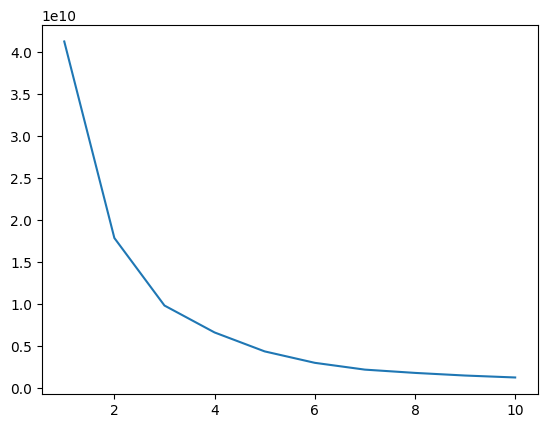

In [65]:
plt.plot(range(1,11),wcss)

In [66]:
X=df.iloc[:,:].values
km=KMeans(n_clusters=4)
y_means = km.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [67]:
y_means

array([0, 3, 0, ..., 0, 0, 0], dtype=int32)

In [68]:
X[y_means==0,2]

array([1, 2, 1, ..., 1, 1, 2])

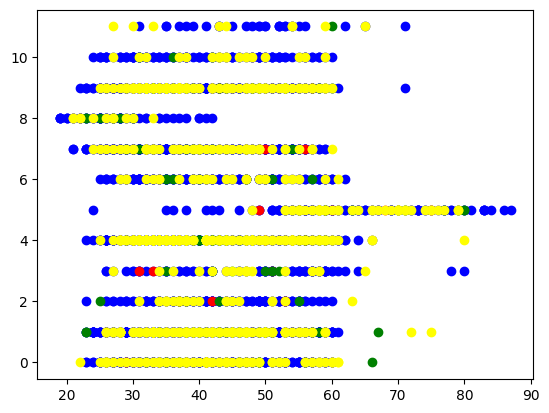

In [69]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],color="blue")
plt.scatter(X[y_means==1,0],X[y_means==1,1],color="red")
plt.scatter(X[y_means==2,0],X[y_means==2,1],color="green")
plt.scatter(X[y_means==3,0],X[y_means==3,1],color="yellow")




In [70]:
X=df.iloc[:,0:3].values
km=KMeans(n_clusters=3)
y_means = km.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


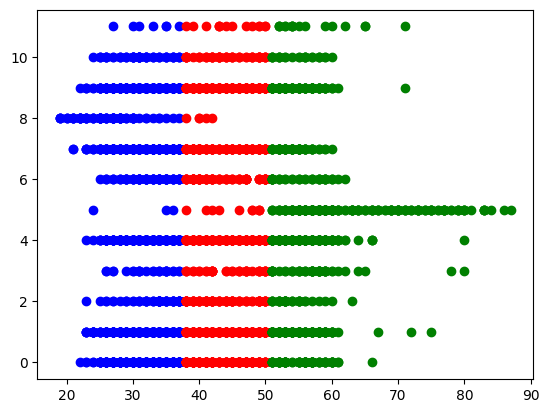

In [71]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],color="blue")
plt.scatter(X[y_means==1,0],X[y_means==1,1],color="red")
plt.scatter(X[y_means==2,0],X[y_means==2,1],color="green")




In [72]:
X=df.iloc[:,-3:-1].values
km=KMeans(n_clusters=3,random_state=10)
y_means = km.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [73]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [74]:
silhoutte_avg=silhouette_score(X,y_means)

In [75]:
silhoutte_avg

0.8987463782667027

In [76]:
silhouette_samples = silhouette_samples(X,y_means)

In [77]:
silhouette_samples

array([0.99558323, 0.57727039, 0.48909636, ..., 0.99558323, 0.54055206,
       0.28496537])

In [78]:
import numpy as np

In [79]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [80]:
X=df[['previous','poutcome']]
X1=df.previous
X2=df.poutcome

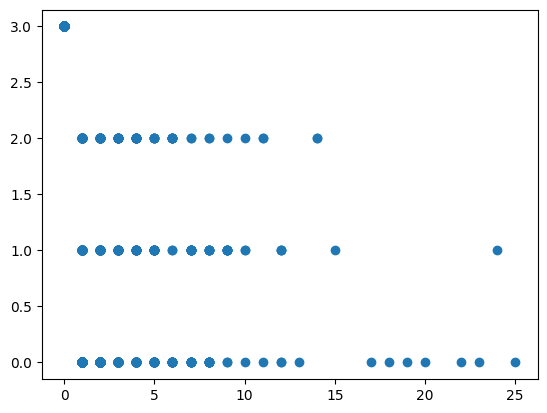

In [81]:
plt.scatter(X1,X2)

In [82]:
from sklearn.cluster import DBSCAN

In [83]:
y = X.to_numpy()

In [84]:
dbscan_cluster_model = DBSCAN(eps=0.2,min_samples=15).fit(X)

In [85]:
df['cluster']=dbscan_cluster_model.labels_

In [86]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0,1
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0,2
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0,14


In [88]:
df['cluster'].value_counts()

 0     3705
 2      182
 5      120
-1       89
 3       67
 6       61
 1       46
 7       43
 4       42
 11      31
 14      30
 8       26
 12      16
 13      16
 9       16
 15      16
 10      15
Name: cluster, dtype: int64

In [91]:
import plotly.express as px

fig = px.scatter(x=X1,y=X2,color=df['cluster'])
fig.show()